In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
turnstile = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt')

In [5]:
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [6]:
turnstile.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205958,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,REGULAR,5554,379
205959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,REGULAR,5554,379
205960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,REGULAR,5554,379
205961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,REGULAR,5554,379
205962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,REGULAR,5554,379


In [7]:
turnstile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205963 entries, 0 to 205962
Data columns (total 11 columns):
C/A                                                                     205963 non-null object
UNIT                                                                    205963 non-null object
SCP                                                                     205963 non-null object
STATION                                                                 205963 non-null object
LINENAME                                                                205963 non-null object
DIVISION                                                                205963 non-null object
DATE                                                                    205963 non-null object
TIME                                                                    205963 non-null object
DESC                                                                    205963 non-null object
ENTRIES                           

In [8]:
turnstile.shape

(205963, 11)

In [9]:
len(turnstile['UNIT'].unique())

469

In [10]:
len(turnstile['STATION'].unique())

378

In [11]:
turnstile.rename(columns = lambda x: x.strip(), inplace = True)

In [12]:
first100 = turnstile.head(100)

In [13]:
def compute_differences(df):
    last_unit = ""
    recent_entries = []
    recent_exits = []
    last_scp = ""

    for ind in df.index:
        row = df.loc[ind].copy()
        unit = row['UNIT']
        entries = row['ENTRIES']
        exits = row['EXITS']
        scp = row['SCP']
        if (unit != last_unit) or (scp != last_scp):
            recent_entries.append(np.NaN)
            recent_exits.append(np.NaN)
        else:
            recent_entries.append(entries - last_entries)
            recent_exits.append(exits - last_exits)
        last_unit = unit
        last_entries = entries
        last_exits = exits
        last_scp = scp
        
    df.loc[:,'RECENT_ENTRIES'] = recent_entries
    df.loc[:,'RECENT_EXITS'] = recent_exits
        
    return df

In [14]:
compute_differences(first100)

/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,13.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,23.0,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,97.0,50.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,217.0,40.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,20:00:00,REGULAR,7108333,2407608,258.0,27.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,00:00:00,REGULAR,7108482,2407628,149.0,20.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,04:00:00,REGULAR,7108500,2407639,18.0,11.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,08:00:00,REGULAR,7108512,2407655,12.0,16.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,12:00:00,REGULAR,7108584,2407707,72.0,52.0


In [15]:
%timeit compute_differences(first100)

89.7 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
len(turnstile['SCP'].unique())

220

In [17]:
turnstile = compute_differences(turnstile)
turnstile

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,13.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,23.0,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,97.0,50.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,217.0,40.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,20:00:00,REGULAR,7108333,2407608,258.0,27.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,00:00:00,REGULAR,7108482,2407628,149.0,20.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,04:00:00,REGULAR,7108500,2407639,18.0,11.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,08:00:00,REGULAR,7108512,2407655,12.0,16.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,12:00:00,REGULAR,7108584,2407707,72.0,52.0


In [18]:
turnstile.describe()

,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
count,2.059630e+05,2.059630e+05,2.010830e+05,2.010830e+05
mean,4.199277e+07,3.430355e+07,-1.236230e+03,-1.381419e+01
std,2.130875e+08,1.962695e+08,2.598470e+06,1.191163e+06
min,0.000000e+00,0.000000e+00,-8.678275e+08,-3.355247e+08
25%,2.743410e+05,1.024065e+05,9.000000e+00,8.000000e+00
50%,2.118270e+06,1.205918e+06,7.400000e+01,5.400000e+01
75%,6.697791e+06,4.592072e+06,2.390000e+02,1.680000e+02
max,2.129237e+09,2.123981e+09,7.665461e+08,3.355249e+08


In [19]:
turnstile[turnstile['RECENT_ENTRIES'] > 10000]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
174966,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,21:00:00,REGULAR,3227098,1134446,15804.0,-335524745.0
186992,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,17:00:00,REGULAR,868286442,174325682,766546084.0,171270855.0


In [20]:
turnstile.iloc[174960:174970]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
174960,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/24/2019,21:00:00,REGULAR,3225920,1134047,178.0,146.0
174961,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,01:00:00,REGULAR,3225972,1134097,52.0,50.0
174962,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,05:00:00,REGULAR,3226002,1134114,30.0,17.0
174963,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,09:00:00,REGULAR,3226375,1134178,373.0,64.0
174964,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,13:00:00,REGULAR,3226597,1134248,222.0,70.0
174965,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,17:00:00,RECOVR AUD,3211294,336659191,-15303.0,335524943.0
174966,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,21:00:00,REGULAR,3227098,1134446,15804.0,-335524745.0
174967,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/26/2019,01:00:00,REGULAR,3227156,1134497,58.0,51.0
174968,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/26/2019,05:00:00,REGULAR,3227183,1134512,27.0,15.0
174969,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/26/2019,08:01:27,REGULAR,3227469,1134552,286.0,40.0


In [21]:
turnstile = turnstile[turnstile['DESC'] == 'REGULAR']

In [22]:
turnstile = compute_differences(turnstile)
turnstile

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,13.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,23.0,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,97.0,50.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,217.0,40.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,20:00:00,REGULAR,7108333,2407608,258.0,27.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,00:00:00,REGULAR,7108482,2407628,149.0,20.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,04:00:00,REGULAR,7108500,2407639,18.0,11.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,08:00:00,REGULAR,7108512,2407655,12.0,16.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,12:00:00,REGULAR,7108584,2407707,72.0,52.0


In [23]:
turnstile.describe()

,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
count,2.052070e+05,2.052070e+05,2.003280e+05,2.003280e+05
mean,4.194368e+07,3.426469e+07,-1.240908e+03,-1.387766e+01
std,2.130251e+08,1.961521e+08,2.603362e+06,5.479833e+05
min,0.000000e+00,0.000000e+00,-8.678275e+08,-1.743245e+08
25%,2.746265e+05,1.028225e+05,9.000000e+00,8.000000e+00
50%,2.118790e+06,1.207751e+06,7.400000e+01,5.400000e+01
75%,6.706050e+06,4.593220e+06,2.390000e+02,1.690000e+02
max,2.129237e+09,2.123981e+09,7.665461e+08,1.712709e+08


In [24]:
turnstile.reset_index(drop = True, inplace = True)
turnstile[turnstile['RECENT_ENTRIES'] > 10000]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
186283,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,17:00:00,REGULAR,868286442,174325682,766546084.0,171270855.0


In [25]:
turnstile.iloc[186277:186287]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
186277,R521,R327,00-06-00,52 ST,7,IRT,06/26/2019,17:00:00,REGULAR,101739968,3053589,132.0,343.0
186278,R521,R327,00-06-00,52 ST,7,IRT,06/26/2019,21:00:00,REGULAR,101740072,3054211,104.0,622.0
186279,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,01:00:00,REGULAR,101740116,3054583,44.0,372.0
186280,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,05:00:00,REGULAR,101740122,3054627,6.0,44.0
186281,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,09:00:00,REGULAR,101740222,3054681,100.0,54.0
186282,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,13:00:00,REGULAR,101740358,3054827,136.0,146.0
186283,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,17:00:00,REGULAR,868286442,174325682,766546084.0,171270855.0
186284,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,21:00:00,REGULAR,868286381,174325095,-61.0,-587.0
186285,R521,R327,00-06-00,52 ST,7,IRT,06/28/2019,01:00:00,REGULAR,868286381,174324716,0.0,-379.0
186286,R521,R327,00-06-00,52 ST,7,IRT,06/28/2019,05:00:00,REGULAR,868286381,174324650,0.0,-66.0


In [26]:
import seaborn as sns

In [27]:
q25, q50, q75 = np.nanpercentile(turnstile['RECENT_ENTRIES'], [25, 50, 75])
print(q25, q50, q75)

9.0 74.0 239.0


In [28]:
iqr = q75 - q25
iqr

230.0

In [29]:
turnstile.groupby(['STATION']).median()

,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
STATION,,,,
1 AV,4573321.5,10258620.5,115.0,120.5
103 ST,11510141.0,5621805.0,240.0,136.5
103 ST-CORONA,5779784.5,7809462.0,274.0,176.0
104 ST,5605679.0,4951604.5,22.0,6.0
110 ST,5184190.0,6076968.5,173.0,180.0
111 ST,3748383.0,3020538.0,56.0,29.0
116 ST,1918610.5,223564.0,181.5,98.0
116 ST-COLUMBIA,11678471.0,5986007.5,69.5,34.0
121 ST,2043938.5,1153873.0,45.0,27.0


In [30]:
bad_indices = turnstile[(turnstile['RECENT_ENTRIES'] > 5000) | (turnstile['RECENT_ENTRIES'] < -5000) | (turnstile['RECENT_EXITS'] > 5000) | (turnstile['RECENT_EXITS'] < -5000)].index

In [31]:
bad_indices

Int64Index([  5746,  25872,  30439,  57153, 121239, 123477, 123695, 125684,
            126843, 126883, 126922, 127002, 127041, 150538, 168522, 186283,
            186287],
           dtype='int64')

In [32]:
turnstile.drop(index = bad_indices, inplace = True)

/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
turnstile.describe()

,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
count,2.051900e+05,2.051900e+05,200311.000000,200311.000000
mean,4.194291e+07,3.426668e+07,170.725791,137.341239
std,2.130258e+08,1.961597e+08,256.186184,238.960582
min,0.000000e+00,0.000000e+00,-2731.000000,-3283.000000
25%,2.746810e+05,1.030232e+05,9.000000,8.000000
50%,2.119502e+06,1.208413e+06,74.000000,54.000000
75%,6.706325e+06,4.593434e+06,239.000000,169.000000
max,2.129237e+09,2.123981e+09,3639.000000,4614.000000


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.00000e+00, 2.60000e+01, 1.19000e+02, 7.90000e+02, 1.77376e+05,
        1.95410e+04, 2.08100e+03, 3.12000e+02, 5.70000e+01, 8.00000e+00]),
 array([-2731., -2094., -1457.,  -820.,  -183.,   454.,  1091.,  1728.,
         2365.,  3002.,  3639.]),
 <a list of 10 Patch objects>)

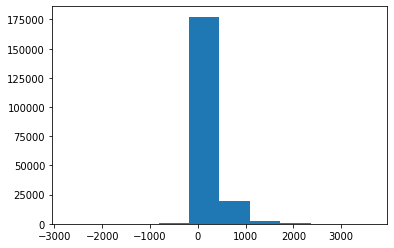

In [35]:
plt.hist(turnstile['RECENT_ENTRIES'])

In [65]:
median_entries = turnstile.groupby(['STATION']).median()['RECENT_ENTRIES']

In [66]:
median_entries.head()

STATION
1 AV             115.0
103 ST           240.0
103 ST-CORONA    274.0
104 ST            22.0
110 ST           173.0
Name: RECENT_ENTRIES, dtype: float64

In [67]:
type(median_entries)

pandas.core.series.Series

In [68]:
median_entries = median_entries.sort_values(axis = 0, ascending = False)

In [69]:
median_entries.head()

STATION
YORK ST           514.0
MYRTLE AV         450.5
GATES AV          372.0
QUEENSBORO PLZ    357.5
NEWKIRK PLAZA     327.0
Name: RECENT_ENTRIES, dtype: float64

In [70]:
top_10 = median_entries.iloc[0:10]

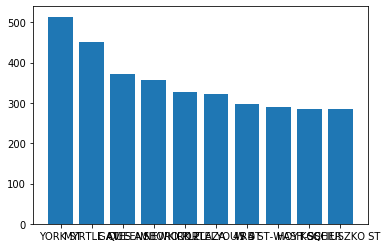

In [71]:
plt.bar(top_10.index, top_10);

In [44]:
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RECENT_ENTRIES,RECENT_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,13.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,23.0,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,97.0,50.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,217.0,40.0


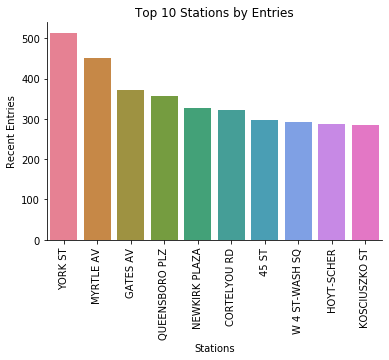

In [128]:
ax = sns.barplot(x = top_10.index,y= top_10,data=turnstile,palette = sns.color_palette("husl", 10))
ax.set(xlabel='Stations', ylabel='Recent Entries')
ax.set_title('Top 10 Stations by Entries')
plt.xticks(rotation=90)
sns.despine();

In [101]:
station_groups.rename(columns = lambda x: x.strip(), inplace = True)

In [112]:
station_groups = turnstile.groupby(by = ['STATION']).median()
station_groups = station_groups.drop(columns = ['ENTRIES','EXITS'])
station_groups = station_groups.sort_values(by=['RECENT_ENTRIES'], ascending = False).head(10)

In [113]:
station_groups.head()

,RECENT_ENTRIES,RECENT_EXITS
STATION,,
YORK ST,514.0,159.0
MYRTLE AV,450.5,177.0
GATES AV,372.0,120.0
QUEENSBORO PLZ,357.5,89.0
NEWKIRK PLAZA,327.0,249.0


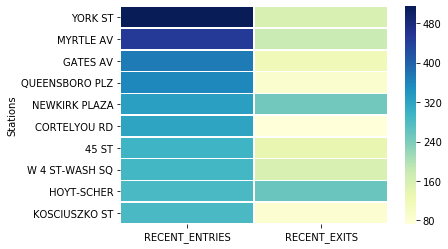

In [134]:
ax = sns.heatmap(station_groups,cmap='YlGnBu',annot=False, linewidth = 0.5);
ax.set(ylabel='Stations')
plt.xticks(rotation=0);